In [ ]:
import pandas as pd
import numpy as np

import re

import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from itertools import *


uploaded = files.upload()

Saving Price_euros_train.csv to Price_euros_train.csv


# Анализ данных

In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Price_euros_train.csv']))
df.head(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
1,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
2,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
3,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
4,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
5,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
6,11,HP,250 G6,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,No OS,1.86kg,393.90
7,12,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,No OS,1.86kg,344.99
8,13,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.8GHz,16GB,256GB SSD,AMD Radeon Pro 555,NaN,1.83kg,2439.97
9,14,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,AMD Radeon R5 M430,Windows 10,2.2kg,498.90


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1108 non-null   int64  
 1   Company           1108 non-null   object 
 2   Product           1108 non-null   object 
 3   TypeName          1108 non-null   object 
 4   Inches            1108 non-null   float64
 5   ScreenResolution  1097 non-null   object 
 6   Cpu               1108 non-null   object 
 7   Ram               1108 non-null   object 
 8   Memory            1108 non-null   object 
 9   Gpu               1108 non-null   object 
 10  OpSys             1055 non-null   object 
 11  Weight            1086 non-null   object 
 12  Price_euros       1108 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 112.7+ KB


Поиск нулевых значений

In [ ]:
df_nan = df.loc[:, df.isnull().any()]
df_nan

,ScreenResolution,OpSys,Weight
0,1440x900,macOS,1.34kg
1,IPS Panel Retina Display 2880x1800,macOS,1.83kg
2,IPS Panel Retina Display 2560x1600,macOS,1.37kg
3,1366x768,Windows 10,2.1kg
4,IPS Panel Retina Display 2880x1800,Mac OS X,2.04kg
...,...,...,...
1103,1366x768,Windows 10,2.2kg
1104,IPS Panel Full HD / Touchscreen 1920x1080,Windows 10,1.8kg
1105,1366x768,Windows 10,1.5kg
1106,1366x768,Windows 10,2.19kg


In [ ]:
df_nan.isnull().sum() / len(df_nan) * 100

ScreenResolution    0.992780
OpSys               4.783394
Weight              1.985560
dtype: float64

In [ ]:
df.ScreenResolution.replace('NaN', np.nan, inplace=True)


In [ ]:
df["ScreenResolution"].value_counts()

Full HD 1920x1080                                429
1366x768                                         241
IPS Panel Full HD 1920x1080                      191
IPS Panel Full HD / Touchscreen 1920x1080         46
Full HD / Touchscreen 1920x1080                   36
1600x900                                          19
Quad HD+ / Touchscreen 3200x1800                  15
Touchscreen 1366x768                              12
IPS Panel 4K Ultra HD 3840x2160                    9
4K Ultra HD / Touchscreen 3840x2160                9
IPS Panel 4K Ultra HD / Touchscreen 3840x2160      8
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              6
IPS Panel 1366x768                                 6
Touchscreen 2256x1504                              5
IPS Panel Retina Display 2304x1440                 5
IPS Panel Retina Display 2560x1600                 5
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Touchscreen 1920x1200               

In [ ]:
df["ScreenResolution"].fillna('Full HD 1920x1080 ', inplace=True)

In [ ]:
df["OpSys"].fillna(df["OpSys"].mode()[0], inplace=True)

In [ ]:
df["Weight"].fillna(df["Weight"].mode()[0], inplace=True)

In [ ]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1108.000000,1108.000000,1108.000000
mean,654.166065,15.033123,1115.214612
std,380.839596,1.419815,688.189083
min,2.000000,10.100000,174.000000
25%,321.750000,14.000000,598.000000
50%,649.500000,15.600000,959.000000
75%,983.250000,15.600000,1480.750000
max,1320.000000,18.400000,5499.000000


In [ ]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [ ]:
df = df.drop('laptop_ID',axis=1)

Поиск дупликатов

In [ ]:
df[df.duplicated()]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1088,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,729.00
1089,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,459.00
1090,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,289.00
1091,Dell,Inspiron 3552,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg,379.00
1092,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,805.99
1093,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,720.32
1094,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1095,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1096,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1097,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.00


In [ ]:
df.drop_duplicates(inplace=True)

Изменение столбца веса

In [ ]:
df['Weight'] = list(map(lambda x: float(re.sub('kg', '', x)), df['Weight']))

df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
1,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
2,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
3,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.10,400.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,2139.97


Изменение столбца Ram

In [ ]:
df['Ram'] = list(map(lambda x: int(re.sub('GB', '', x)), df['Ram']))

df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
1,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
2,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
3,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,400.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,2139.97


Изменение столбца памяти ноутбука

In [ ]:
df['Memory'].value_counts()

256GB SSD                        344
1TB HDD                          182
500GB HDD                        111
512GB SSD                         97
128GB SSD +  1TB HDD              81
256GB SSD +  1TB HDD              66
128GB SSD                         62
32GB Flash Storage                33
2TB HDD                           14
1TB SSD                           11
512GB SSD +  1TB HDD              11
64GB Flash Storage                10
256GB SSD +  2TB HDD               9
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           5
256GB Flash Storage                5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
180GB SSD                          3
128GB SSD +  2TB HDD               2
16GB SSD                           2
256GB SSD +  256GB SSD             2
256GB SSD +  500GB HDD             2
1TB SSD +  1TB HDD                 2
512GB Flash Storage                2
64GB SSD                           1
2

In [ ]:
temp_ssd = list(map(lambda x: re.findall('\d+GB SSD|\d+TB SSD', x), df['Memory']))

temp_ssd[0:10]

[[],
 ['512GB SSD'],
 ['256GB SSD'],
 [],
 [],
 ['512GB SSD'],
 [],
 [],
 ['256GB SSD'],
 ['256GB SSD']]

In [ ]:
# ssd
final_ssd = []

for i in range(len(temp_ssd)):

    for j in range(len(temp_ssd[i])):
        if re.search('TB', temp_ssd[i][j]):
            temp_ssd[i][j] = int(re.sub('TB SSD', '', temp_ssd[i][j]))*1000 # Convert TB to GB
        else:
            temp_ssd[i][j] = int(re.sub('GB SSD', '', temp_ssd[i][j]))

    final_ssd.append( np.sum(temp_ssd[i]))

final_ssd[0:10]

[0.0, 512, 256, 0.0, 0.0, 512, 0.0, 0.0, 256, 256]

In [ ]:
# HDD Storage
temp_hdd = list(map(lambda x: re.findall('\d+GB HDD|\d+TB HDD', x), df['Memory']))
final_hdd = []

for i in range(len(temp_hdd)):

    for j in range(len(temp_hdd[i])):
        if re.search('TB', temp_hdd[i][j]):
            temp_hdd[i][j] = int(re.sub('TB HDD', '', temp_hdd[i][j]))*1000 #  TB to GB
        else:
            temp_hdd[i][j] = int(re.sub('GB HDD', '', temp_hdd[i][j]))

    final_hdd.append( np.sum(temp_hdd[i])) #

# Flash Storage
temp_flash = list(map(lambda x: re.findall('\d+GB Flash|\d+TB Flash', x), df['Memory']))
final_flash = []

for i in range(len(temp_flash)):

    for j in range(len(temp_flash[i])):
        if re.search('TB', temp_flash[i][j]):
            temp_flash[i][j] = int(re.sub('TB Flash', '', temp_flash[i][j]))*1000 # TB to GB
        else:
            temp_flash[i][j] = int(re.sub('GB Flash', '', temp_flash[i][j]))

    final_flash.append( np.sum(temp_flash[i]))

In [ ]:
df['ssd'] = final_ssd
df['hdd'] = final_hdd
df['flash'] = final_flash

df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ssd,hdd,flash
0,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0.0,0.0,128.0
1,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,512.0,0.0,0.0
2,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256.0,0.0,0.0
3,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,400.00,0.0,500.0,0.0
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,2139.97,0.0,0.0,256.0


Изменение столбца CPU

In [ ]:
df_cpu = list(map(lambda x: re.findall('.*? \d+', x)[0].strip(), df['Cpu']))
df_cpu = list(map(lambda x: re.sub(' \d+.*', '', x), df_cpu))
df_cpu = list(map(lambda x: re.sub('[-].*', '', x), df_cpu))
df_cpu = list(map(lambda x: re.sub(' [A-Z]\d+.*', '', x), df_cpu))

pd.DataFrame(df_cpu).value_counts()

Intel Core i7              435
Intel Core i5              358
Intel Core i3              119
Intel Celeron Dual Core     60
AMD                         38
Intel Pentium Quad Core     20
Intel Core M                14
AMD E                        9
Intel Atom x5                9
Intel Celeron Quad Core      7
AMD Ryzen                    4
Intel Xeon                   4
Intel Atom                   3
Intel Pentium Dual Core      3
Intel Core M m3              2
AMD FX                       2
Samsung Cortex               1
dtype: int64

In [ ]:
laptop_cpu_clock = list(map(lambda x: float(re.sub('GHz', '', re.findall('\d+GHz|\d+[.]\d+.*GHz', x)[0])), df['Cpu']))

laptop_cpu_clock[0:10]

[1.8, 2.7, 3.1, 3.0, 2.2, 1.8, 2.5, 2.0, 2.8, 2.0]

In [ ]:
df['cpu_type'] = df_cpu
df['cpu_clock'] = laptop_cpu_clock

df.head(10)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ssd,hdd,flash,cpu_type,cpu_clock
0,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0.0,0.0,128.0,Intel Core i5,1.8
1,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,512.0,0.0,0.0,Intel Core i7,2.7
2,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256.0,0.0,0.0,Intel Core i5,3.1
3,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,400.00,0.0,500.0,0.0,AMD,3.0
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,2139.97,0.0,0.0,256.0,Intel Core i7,2.2
5,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,1495.00,512.0,0.0,0.0,Intel Core i7,1.8
6,HP,250 G6,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,No OS,1.86,393.90,0.0,500.0,0.0,Intel Core i5,2.5
7,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,No OS,1.86,344.99,0.0,500.0,0.0,Intel Core i3,2.0
8,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.8GHz,16,256GB SSD,AMD Radeon Pro 555,Windows 10,1.83,2439.97,256.0,0.0,0.0,Intel Core i7,2.8
9,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,256GB SSD,AMD Radeon R5 M430,Windows 10,2.20,498.90,256.0,0.0,0.0,Intel Core i3,2.0


Изменение GPU

In [ ]:
gpu_type = list(map(lambda x: " ".join(x.split()[0:2]), df['Gpu']))

df['gpu_type'] = gpu_type

df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ssd,hdd,flash,cpu_type,cpu_clock,gpu_type
0,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0.0,0.0,128.0,Intel Core i5,1.8,Intel HD
1,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,512.0,0.0,0.0,Intel Core i7,2.7,AMD Radeon
2,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256.0,0.0,0.0,Intel Core i5,3.1,Intel Iris
3,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,400.00,0.0,500.0,0.0,AMD,3.0,AMD Radeon
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,2139.97,0.0,0.0,256.0,Intel Core i7,2.2,Intel Iris


Изменение ScreenRes

In [ ]:
touch_screen = []

for i in range(len(df['ScreenResolution'])):
    if re.search('Touchscreen', df['ScreenResolution'][i]):
        touch_screen.append(1)
    else:
        touch_screen.append(0)

touch_screen[0:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]

In [ ]:
screen_width_str = list(map(lambda x: re.sub('x', '', re.findall('\d+.*?x', x)[0]), df['ScreenResolution']))
screen_width = []

for i in range(len(screen_width_str)):
    if re.search('4K', screen_width_str[i]):
       screen_width.append(3840)
    else:
        screen_width.append(int(screen_width_str[i]))

screen_width[0:10]

[1440, 2880, 2560, 1366, 2880, 1920, 1366, 1920, 2880, 1920]

In [ ]:
screen_height_str = list(map(lambda x: re.sub('x', '', re.findall('x.*\d+', x)[0]), df['ScreenResolution']))
screen_height = []

for i in range(len(screen_height_str)):
    if re.search('4K', screen_height_str[i]):
       screen_height.append(2160)
    else:
        screen_height.append(int(screen_height_str[i]))

screen_height[0:10]

[900, 1800, 1600, 768, 1800, 1080, 768, 1080, 1800, 1080]

In [ ]:
monitor_type = list(map(lambda x: re.sub('\d+.*x.*', '', x), df['ScreenResolution']))
monitor_type = list(map(lambda x: re.sub('Touchscreen', '', x), monitor_type))
monitor_type = list(map(lambda x: re.sub('[/]', '', x).strip(), monitor_type))

for i in range(len(monitor_type)):
    if monitor_type[i] == '':
        monitor_type[i] = 'others'

pd.DataFrame(monitor_type).value_counts()

Full HD                     476
others                      295
IPS Panel Full HD           236
IPS Panel                    42
Quad HD+                     17
IPS Panel Retina Display     15
IPS Panel Quad HD+            7
dtype: int64

In [ ]:
df['touchscreen'] = touch_screen
df['screen_width'] = screen_width
df['screen_height'] = screen_height
df['monitor_type'] = monitor_type

df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,ssd,hdd,flash,cpu_type,cpu_clock,gpu_type,touchscreen,screen_width,screen_height,monitor_type
0,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,...,0.0,0.0,128.0,Intel Core i5,1.8,Intel HD,0,1440,900,others
1,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,...,512.0,0.0,0.0,Intel Core i7,2.7,AMD Radeon,0,2880,1800,IPS Panel Retina Display
2,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,...,256.0,0.0,0.0,Intel Core i5,3.1,Intel Iris,0,2560,1600,IPS Panel Retina Display
3,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,...,0.0,500.0,0.0,AMD,3.0,AMD Radeon,0,1366,768,others
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,...,0.0,0.0,256.0,Intel Core i7,2.2,Intel Iris,0,2880,1800,IPS Panel Retina Display


Удалим ненужные для построения модели столбцы

In [ ]:
laptop_clean = df.copy()
laptop_clean.drop([ 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu'], axis = 1, inplace = True)

laptop_clean.head()

,Company,Inches,Ram,OpSys,Weight,Price_euros,ssd,hdd,flash,cpu_type,cpu_clock,gpu_type,touchscreen,screen_width,screen_height,monitor_type
0,Apple,13.3,8,macOS,1.34,898.94,0.0,0.0,128.0,Intel Core i5,1.8,Intel HD,0,1440,900,others
1,Apple,15.4,16,macOS,1.83,2537.45,512.0,0.0,0.0,Intel Core i7,2.7,AMD Radeon,0,2880,1800,IPS Panel Retina Display
2,Apple,13.3,8,macOS,1.37,1803.60,256.0,0.0,0.0,Intel Core i5,3.1,Intel Iris,0,2560,1600,IPS Panel Retina Display
3,Acer,15.6,4,Windows 10,2.10,400.00,0.0,500.0,0.0,AMD,3.0,AMD Radeon,0,1366,768,others
4,Apple,15.4,16,Mac OS X,2.04,2139.97,0.0,0.0,256.0,Intel Core i7,2.2,Intel Iris,0,2880,1800,IPS Panel Retina Display


Проверим данные на наличие выбросов т.к. модель линейной регрессии к ним чувствительна

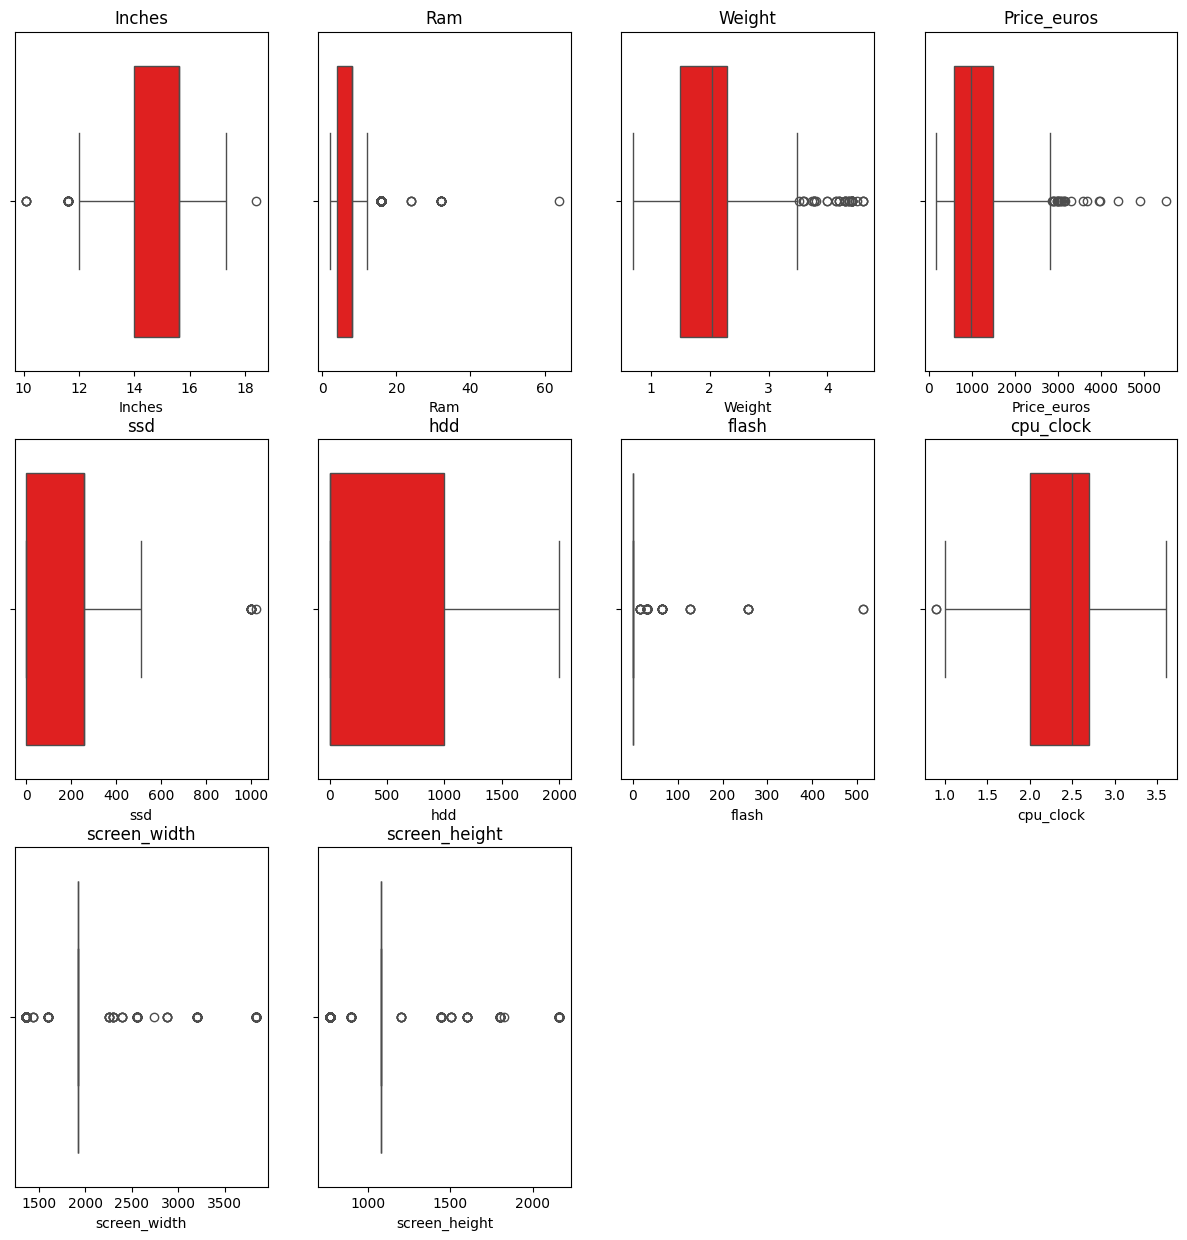

In [ ]:
numeric_cols = ['Inches',	'Ram','Weight',	'Price_euros',	'ssd',	'hdd',	'flash','cpu_clock',	'screen_width',	'screen_height']
plt.figure(figsize=(15, 15))
for i in range(10) :
    plt.subplot(3,4,i+1)

    sns.boxplot(x=df[numeric_cols[i]],color='RED')
    plt.title(numeric_cols[i])
plt.show()

<Axes: >

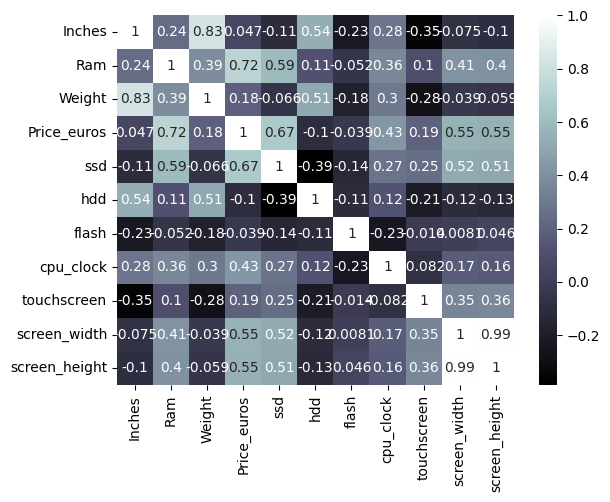

In [ ]:
sns.heatmap(df.corr(),annot = True,cmap='bone')

#Encoding

Присвоим числовые значения строковым данным

Для типа процессора

In [ ]:
cpu_label = LabelEncoder().fit(laptop_clean['cpu_type']).transform(laptop_clean['cpu_type'])
cpu_label = cpu_label.reshape(len(laptop_clean['cpu_type']), 1)

cpu_label = OneHotEncoder(drop = 'first').fit(cpu_label).transform(cpu_label).toarray()

cpu_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
cpu_name = list(set(laptop_clean['cpu_type']))
cpu_name.sort()
cpu_name = list(map(lambda x: 'cpu_' + x, cpu_name))
cpu_name = cpu_name[ 1:len(cpu_name) ]

cpu_onehot = pd.DataFrame(cpu_label, columns = cpu_name)

cpu_onehot.head()

,cpu_AMD E,cpu_AMD FX,cpu_AMD Ryzen,cpu_Intel Atom,cpu_Intel Atom x5,cpu_Intel Celeron Dual Core,cpu_Intel Celeron Quad Core,cpu_Intel Core M,cpu_Intel Core M m3,cpu_Intel Core i3,cpu_Intel Core i5,cpu_Intel Core i7,cpu_Intel Pentium Dual Core,cpu_Intel Pentium Quad Core,cpu_Intel Xeon,cpu_Samsung Cortex
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
laptop_clean = pd.concat([laptop_clean.reset_index(drop = True), cpu_onehot], axis = 1)

laptop_clean.head()

,Company,Inches,Ram,OpSys,Weight,Price_euros,ssd,hdd,flash,cpu_type,...,cpu_Intel Celeron Quad Core,cpu_Intel Core M,cpu_Intel Core M m3,cpu_Intel Core i3,cpu_Intel Core i5,cpu_Intel Core i7,cpu_Intel Pentium Dual Core,cpu_Intel Pentium Quad Core,cpu_Intel Xeon,cpu_Samsung Cortex
0,Apple,13.3,8,macOS,1.34,898.94,0.0,0.0,128.0,Intel Core i5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Apple,15.4,16,macOS,1.83,2537.45,512.0,0.0,0.0,Intel Core i7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Apple,13.3,8,macOS,1.37,1803.60,256.0,0.0,0.0,Intel Core i5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Acer,15.6,4,Windows 10,2.10,400.00,0.0,500.0,0.0,AMD,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Apple,15.4,16,Mac OS X,2.04,2139.97,0.0,0.0,256.0,Intel Core i7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Для GPU

In [ ]:
gpu_label = LabelEncoder().fit(laptop_clean['gpu_type']).transform(laptop_clean['gpu_type'])
gpu_label = gpu_label.reshape(len(laptop_clean['gpu_type']), 1)

gpu_label = OneHotEncoder(drop = 'first').fit(gpu_label).transform(gpu_label).toarray()

gpu_name = list(set(laptop_clean['gpu_type']))
gpu_name.sort()
gpu_name = list(map(lambda x: 'gpu_' + x, gpu_name))
gpu_name = gpu_name[ 1:len(gpu_name) ]

gpu_onehot = pd.DataFrame(gpu_label, columns = gpu_name)

laptop_clean = pd.concat([laptop_clean.reset_index(drop = True), gpu_onehot], axis = 1)

laptop_clean.head()

,Company,Inches,Ram,OpSys,Weight,Price_euros,ssd,hdd,flash,cpu_type,...,gpu_AMD R4,gpu_AMD Radeon,gpu_ARM Mali,gpu_Intel Graphics,gpu_Intel HD,gpu_Intel Iris,gpu_Intel UHD,gpu_Nvidia GTX,gpu_Nvidia GeForce,gpu_Nvidia Quadro
0,Apple,13.3,8,macOS,1.34,898.94,0.0,0.0,128.0,Intel Core i5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Apple,15.4,16,macOS,1.83,2537.45,512.0,0.0,0.0,Intel Core i7,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Apple,13.3,8,macOS,1.37,1803.60,256.0,0.0,0.0,Intel Core i5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Acer,15.6,4,Windows 10,2.10,400.00,0.0,500.0,0.0,AMD,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Apple,15.4,16,Mac OS X,2.04,2139.97,0.0,0.0,256.0,Intel Core i7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Для операционной системы

In [ ]:
os_label = LabelEncoder().fit(laptop_clean['OpSys']).transform(laptop_clean['OpSys'])
os_label = os_label.reshape(len(laptop_clean['OpSys']), 1)

os_label = OneHotEncoder(drop = 'first').fit(os_label).transform(os_label).toarray()

os_name = list(set(laptop_clean['OpSys']))
os_name.sort()
os_name = list(map(lambda x: 'os_' + x, os_name))
os_name = os_name[ 1:len(os_name) ]

os_onehot = pd.DataFrame(os_label, columns = os_name)

laptop_clean = pd.concat([laptop_clean.reset_index(drop = True), os_onehot], axis = 1)

laptop_clean.head()

,Company,Inches,Ram,OpSys,Weight,Price_euros,ssd,hdd,flash,cpu_type,...,gpu_Nvidia GeForce,gpu_Nvidia Quadro,os_Chrome OS,os_Linux,os_Mac OS X,os_No OS,os_Windows 10,os_Windows 10 S,os_Windows 7,os_macOS
0,Apple,13.3,8,macOS,1.34,898.94,0.0,0.0,128.0,Intel Core i5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Apple,15.4,16,macOS,1.83,2537.45,512.0,0.0,0.0,Intel Core i7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Apple,13.3,8,macOS,1.37,1803.60,256.0,0.0,0.0,Intel Core i5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Acer,15.6,4,Windows 10,2.10,400.00,0.0,500.0,0.0,AMD,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Apple,15.4,16,Mac OS X,2.04,2139.97,0.0,0.0,256.0,Intel Core i7,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Для компании

In [ ]:
company_label = LabelEncoder().fit(laptop_clean['Company']).transform(laptop_clean['Company'])
company_label = company_label.reshape(len(laptop_clean['Company']), 1)

company_label = OneHotEncoder(drop = 'first').fit(company_label).transform(company_label).toarray()

company_name = list(set(laptop_clean['Company']))
company_name.sort()
company_name = list(map(lambda x: 'company_' + x, company_name))
company_name = company_name[ 1:len(company_name) ]

company_onehot = pd.DataFrame(company_label, columns = company_name)

laptop_clean = pd.concat([laptop_clean.reset_index(drop = True), company_onehot], axis = 1)

laptop_clean.head()

,Company,Inches,Ram,OpSys,Weight,Price_euros,ssd,hdd,flash,cpu_type,...,company_LG,company_Lenovo,company_MSI,company_Mediacom,company_Microsoft,company_Razer,company_Samsung,company_Toshiba,company_Vero,company_Xiaomi
0,Apple,13.3,8,macOS,1.34,898.94,0.0,0.0,128.0,Intel Core i5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Apple,15.4,16,macOS,1.83,2537.45,512.0,0.0,0.0,Intel Core i7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Apple,13.3,8,macOS,1.37,1803.60,256.0,0.0,0.0,Intel Core i5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Acer,15.6,4,Windows 10,2.10,400.00,0.0,500.0,0.0,AMD,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Apple,15.4,16,Mac OS X,2.04,2139.97,0.0,0.0,256.0,Intel Core i7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Удалим ненужные столбцы

In [ ]:
laptop_clean = laptop_clean.select_dtypes(include = 'number')
laptop_clean.columns = list(map(lambda x: re.sub(' ', '_', x), laptop_clean.columns))

laptop_clean.head()

,Inches,Ram,Weight,Price_euros,ssd,hdd,flash,cpu_clock,touchscreen,screen_width,...,company_LG,company_Lenovo,company_MSI,company_Mediacom,company_Microsoft,company_Razer,company_Samsung,company_Toshiba,company_Vero,company_Xiaomi
0,13.3,8,1.34,898.94,0.0,0.0,128.0,1.8,0,1440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.4,16,1.83,2537.45,512.0,0.0,0.0,2.7,0,2880,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13.3,8,1.37,1803.60,256.0,0.0,0.0,3.1,0,2560,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15.6,4,2.10,400.00,0.0,500.0,0.0,3.0,0,1366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15.4,16,2.04,2139.97,0.0,0.0,256.0,2.2,0,2880,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
laptop_clean.columns

Index(['Inches', 'Ram', 'Weight', 'Price_euros', 'ssd', 'hdd', 'flash',
       'cpu_clock', 'touchscreen', 'screen_width', 'screen_height',
       'cpu_AMD_E', 'cpu_AMD_FX', 'cpu_AMD_Ryzen', 'cpu_Intel_Atom',
       'cpu_Intel_Atom_x5', 'cpu_Intel_Celeron_Dual_Core',
       'cpu_Intel_Celeron_Quad_Core', 'cpu_Intel_Core_M',
       'cpu_Intel_Core_M_m3', 'cpu_Intel_Core_i3', 'cpu_Intel_Core_i5',
       'cpu_Intel_Core_i7', 'cpu_Intel_Pentium_Dual_Core',
       'cpu_Intel_Pentium_Quad_Core', 'cpu_Intel_Xeon', 'cpu_Samsung_Cortex',
       'gpu_AMD_R17M-M1-70', 'gpu_AMD_R4', 'gpu_AMD_Radeon', 'gpu_ARM_Mali',
       'gpu_Intel_Graphics', 'gpu_Intel_HD', 'gpu_Intel_Iris', 'gpu_Intel_UHD',
       'gpu_Nvidia_GTX', 'gpu_Nvidia_GeForce', 'gpu_Nvidia_Quadro',
       'os_Chrome_OS', 'os_Linux', 'os_Mac_OS_X', 'os_No_OS', 'os_Windows_10',
       'os_Windows_10_S', 'os_Windows_7', 'os_macOS', 'company_Apple',
       'company_Asus', 'company_Chuwi', 'company_Dell', 'company_Fujitsu',
       'company

# Обучение модели

In [ ]:
x_laptop = laptop_clean.drop('Price_euros', axis = 1)
y_laptop = laptop_clean['Price_euros']

x_train, x_test, y_train, y_test = train_test_split(x_laptop, y_laptop, test_size = 0.2, random_state = 100)

print("Number of Data Train: " + str(x_train.shape[0]))

Number of Data Train: 870


In [ ]:
lm_model = LinearRegression().fit(x_train, y_train)

In [ ]:
pred_lm = lm_model.predict(x_test)

print('R2 Score: ' + str(np.round(r2_score(y_test, pred_lm), 3)))

R2 Score: 0.75


In [ ]:
print('RMSE: ' + str(np.round(np.sqrt(mean_squared_error(y_test, pred_lm)), 3)) )

RMSE: 322.849


In [ ]:
print('Price Standard Deviation: ' + str(np.round(np.std(y_test), 3)))

Price Standard Deviation: 646.336
